# Nube de palabras

Nube de palabras usando la base de datos de la biblia.

- librerias

In [1]:
import re
import numpy as np
import json
import pandas as pd

from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

import PIL.Image
from IPython.display import display

In [2]:
biblia = pd.read_excel('C:/Users/diego.diaz/Desktop/script seg KL/NLP/Clase6/Biblia.xlsx',sheet_name='versiculos')

In [3]:
biblia.sample(10)

,book_id,chapter,verse,text
3285,3,19,4,No os volveréis a los ídolos ni haréis para vo...
14798,19,59,8,Mas tú Jehová te reirás de ellos Te burlarás d...
20329,25,1,19,Dí voces a mis amadores mas ellos me han engañ...
5650,5,28,39,Plantarás viñas y labrarás mas no beberás vino...
15462,19,95,8,No endurezcáis vuestro corazón como en Meriba ...
20705,26,12,25,Porque yo Jehová hablaré; cumplirase la palabr...
6123,6,11,16,Tomó pues Josué toda aquella tierra las montañ...
5994,6,7,18,E hizo allegar su casa por los varones y fue t...
16968,20,20,14,El que compra dice: Malo es malo es: Mas en ap...
11220,14,2,9,Para que me apresten mucha madera porque la ca...


In [4]:
def quitar_tildes(s):
    tildes = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for origen, destino in tildes:
        s = s.replace(origen, destino)
    return s

In [5]:
stopwords_sp = stopwords.words('spanish')
stopwords_sp = stopwords_sp + ['mas']

def pre_procesado(texto):
    
    texto = texto.lower() # minúsculas
    texto = re.sub(r"[\W\d_]+", " ",texto) # remove caract, números
    texto = quitar_tildes(texto) # remove tildes
    texto = texto.split() # tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp] # stopwords
    texto = " ".join(texto)
    return texto

In [6]:
biblia['preprocesado'] = biblia['text '].apply(lambda versi: pre_procesado(versi))
biblia.head()

,book_id,chapter,verse,text,preprocesado
0,1,1,1,En el principio crió Dios los cielos y la tierra.,principio crio dios cielos tierra
1,1,1,2,Y la tierra estaba desordenada y vacía y las t...,tierra desordenada vacia tinieblas haz abismo ...
2,1,1,3,Y dijo Dios: Sea la luz: y fue la luz.,dijo dios luz luz
3,1,1,4,Y vio Dios que la luz era buena: y apartó Dios...,vio dios luz buena aparto dios luz tinieblas
4,1,1,5,Y llamó Dios a la luz Día y a las tinieblas ll...,llamo dios luz dia tinieblas llamo noche tarde...


- imagen de contorno

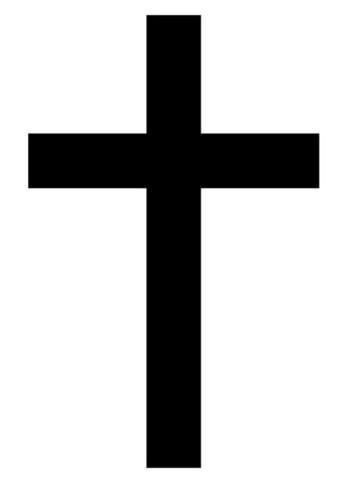

In [7]:
cruz = PIL.Image.open("cruz.jpg")
display(cruz)

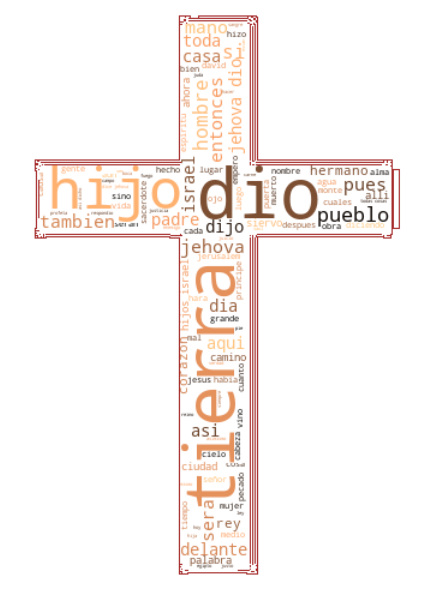

In [8]:
cruz_mask = np.array(cruz)

palabras = biblia.preprocesado.str.cat(sep=" ")
 
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='copper_r',
                      stopwords=None,
                      mask=cruz_mask, contour_width=0.5, contour_color='brown').generate(palabras)
 
wordcloud.to_file("cruz_wordcloud.png")
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()